In [1]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy.signal import find_peaks
import SAED
from numpy.polynomial import Polynomial

In [2]:
img_full = plt.imread(os.path.join(os.getcwd(), 'data', 'LaB6_H2O_3.tif')).astype(np.int32).copy()
for i in range(4,7):
    img_full += plt.imread(os.path.join(os.getcwd(), 'data', 'LaB6_H2O_' + str(i) + '.tif'))
print(img_full.shape)
img = img_full[120:850,420:1150,0].T
print(f'{img.shape=}')

(1032, 1376, 4)
img.shape=(730, 730)


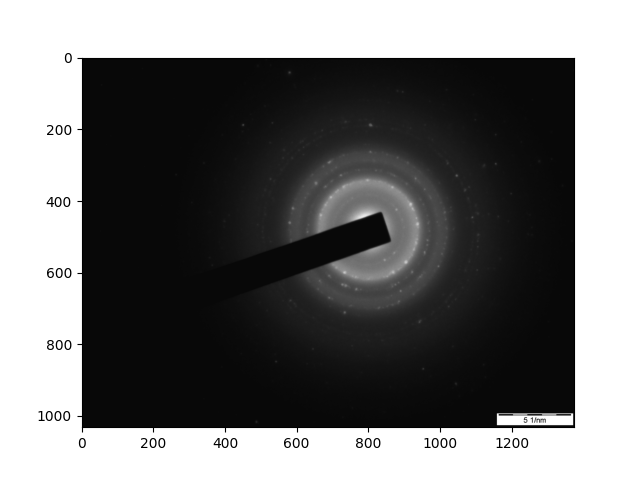

In [32]:
fig, ax = plt.subplots()
center = (378,359)
#img[center[0]-10:center[0]+10,center[1]-10:center[1]+10] = 250*4
ax.imshow((img/4).astype(np.int32).T)
fig.canvas.toolbar_visible = True
#display(fig)
# pixels per 1/nm
scale = 40.4
plt.imsave(os.path.join(os.getcwd(),'source.png'),img.T,dpi=400)


Spectrum calculated


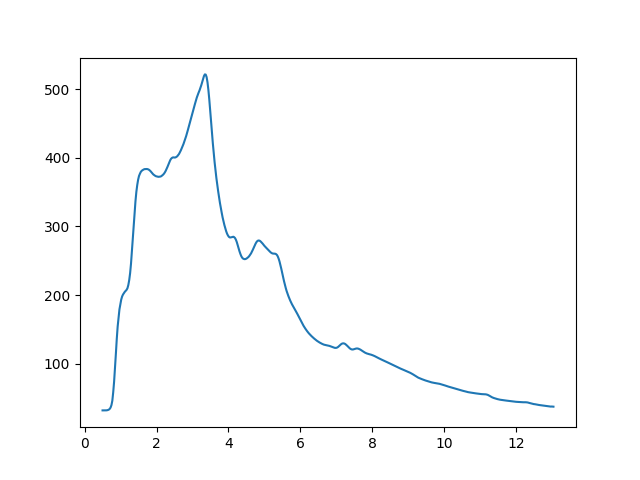

In [4]:
x = np.arange(-center[0], img.shape[0] - center[0])
y = np.arange(-center[1], img.shape[1] - center[1])
xs, ys = np.meshgrid(x, y, sparse=True, indexing='xy')
zs = np.sqrt(xs**2 + ys**2)
res = SAED.calc_spectrum(img.T,zs,40.4)
plt.subplots()
plt.plot(res[:,0],res[:,1])

Start SAED calculation for (x,y) = (375, 356)
(730, 730)
Spectrum calculated
New max val =  505.92028985507244
New center (x,y) =  (375, 356)
Start SAED calculation for (x,y) = (375, 357)
(730, 730)
Spectrum calculated
New max val =  508.7361111111111
New center (x,y) =  (375, 357)
Start SAED calculation for (x,y) = (375, 358)
(730, 730)
Spectrum calculated
New max val =  511.43971631205676
New center (x,y) =  (375, 358)
Start SAED calculation for (x,y) = (375, 359)
(730, 730)
Spectrum calculated
New max val =  514.1687425860024
New center (x,y) =  (375, 359)
Start SAED calculation for (x,y) = (375, 360)
(730, 730)
Spectrum calculated
New max val =  516.4934756820878
New center (x,y) =  (375, 360)
Start SAED calculation for (x,y) = (375, 361)
(730, 730)
Spectrum calculated
New max val =  517.829705882353
New center (x,y) =  (375, 361)
Start SAED calculation for (x,y) = (375, 362)
(730, 730)
Spectrum calculated
Start SAED calculation for (x,y) = (376, 356)
(730, 730)
Spectrum calculated

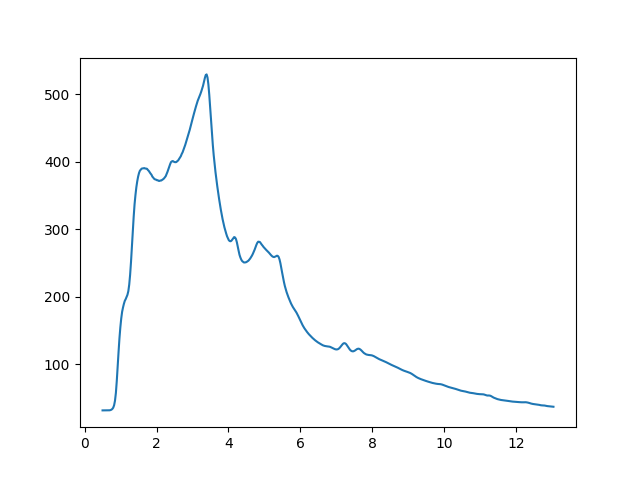

In [5]:
opt_spec, new_cent = SAED.optimize_position(img.T,center,6,6)
plt.subplots()
plt.plot(opt_spec[:,0], opt_spec[:,1])


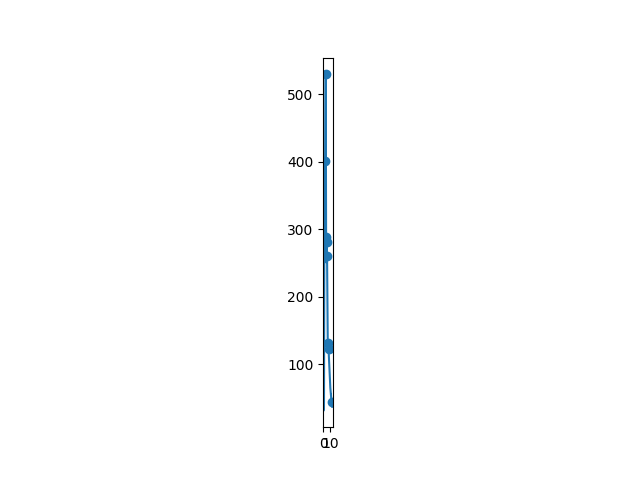

In [11]:
peak_manual, _ =  find_peaks(opt_spec[:,1], prominence=0.1)
peak_manual = peak_manual[1:]
ax = plt.subplot()
ax.clear()
ax.plot(opt_spec[:,0], opt_spec[:,1])
ax.scatter(opt_spec[peak_manual,0], opt_spec[peak_manual,1])
plt.show()

img_grey.shape=(730, 730, 4)
img_peaks.shape=(730, 730)
[ 21  21  21 255]


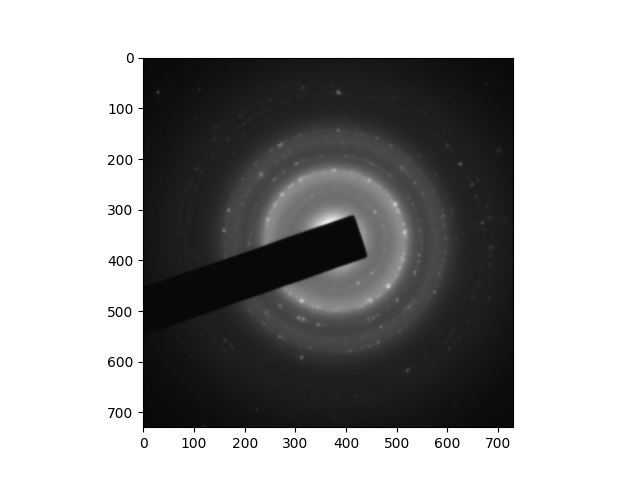

In [35]:
width = 4
plt.close('all')
x = np.arange(-new_cent[1], img.shape[1] - new_cent[1])
y = np.arange(-new_cent[0], img.shape[0] - new_cent[0])
xs, ys = np.meshgrid(x, y, sparse=True, indexing='xy')
zs = np.sqrt(xs**2 + ys**2)

img_peaks = (img/4).astype(np.uint8).copy()
for x in peak_manual:
    ring = np.ones(zs.shape)
    ring[zs < (res[x,0]*scale - width/2)] = 0
    ring[zs > (res[x,0]*scale + width/2)] = 0
    #img_peaks[(ring>0)*(xs<0)*(ys>0)] = 1
plt.subplots()
img_grey = np.repeat(img_peaks[:,:,np.newaxis],4,axis=2)
img_grey[:,:,3] = 255
img_grey = img_grey
print(f'{img_grey.shape=}')
print(f'{img_peaks.shape=}')
print(img_grey[100,100,:])
plt.imshow(img_grey.swapaxes(1,0).copy())
plt.imsave(os.path.join(os.getcwd(),'source.png'),img_grey.swapaxes(0,1).copy(),dpi=400)

In [34]:
np.savetxt(os.path.join(os.getcwd(),'lab6_peaks.txt'),opt_spec[peak_manual,0], header='Values in 1/nm')